# seaborn - Visualizing statistical relationships  

この資料では、以下の seaborn のチュートリアルを簡単に翻訳しつつ、使い方を紹介しています。  
[Visualizing statistical relationships](https://seaborn.pydata.org/tutorial/relational.html)  

[seaborn.relplot](http://seaborn.pydata.org/generated/seaborn.relplot.html?highlight=relplot#seaborn.relplot) を使って、「統計的な関連性の可視化」を行っていきます。  
なお、seaborn.relplot 自体は下記の関数のインターフェースであり、引数 `kind` に渡される値で描画する図を選択することができます。   

- [seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot) (with kind="scatter"; the default)  
- [seaborn.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot) (with kind="line")  

In [1]:
# モジュールのインポート
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")

|引数|スタイル|
|-|-|
|`darkgrid`|背景暗、グリッドあり。デフォルト。|
|`dark`|背景暗、グリッドなし。|
|`whitegrid`|背景白、グリッドあり。|
|`white`|背景白、グリッドなし。|
|`ticks`|背景白、軸にのみグリッドあり。|v

## Relating variables with scatter plots  

関連性のある変数の散布図  


In [2]:
# sns.load_dataset() は https://github.com/mwaskom/seaborn-data から
# 指定したデータセットダウンロードし、pd.DataFrame で返す
tips = sns.load_dataset("tips")
type(tips)

pandas.core.frame.DataFrame

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


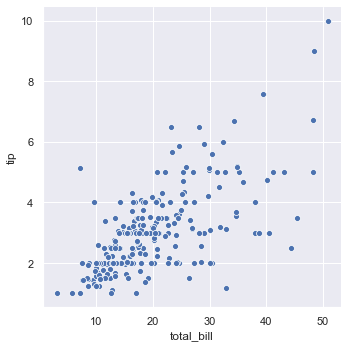

In [4]:
# 散布図の描画
# 行末のセミコロンはセルに何も出力させないようにするためのもの
# 描画される図は出力とは別なので問題ない
sns.relplot(x="total_bill", y="tip", data=tips);  

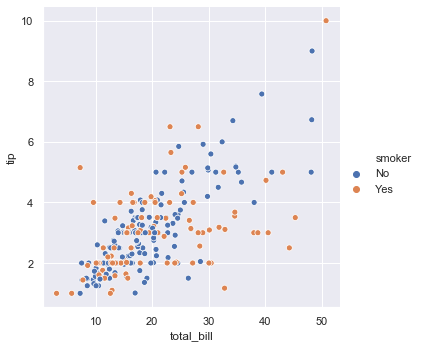

In [5]:
# hue → 色調 2 次元の散布図に第 3 の次元を与える
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

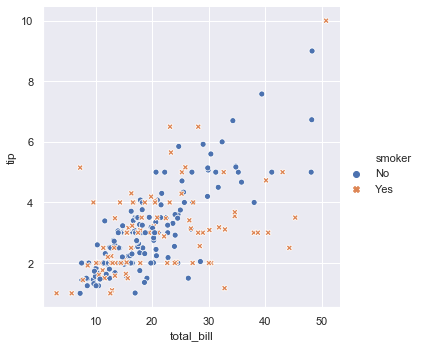

In [6]:
# さらに、マーカーの style (形) を分けてアクセシビリティを向上させる
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips);

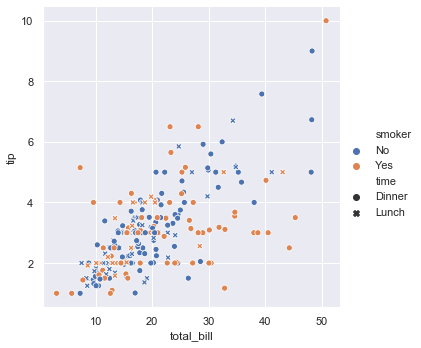

In [7]:
#　hue と style で参照する系列を分ければ第 4 の次元になる 
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

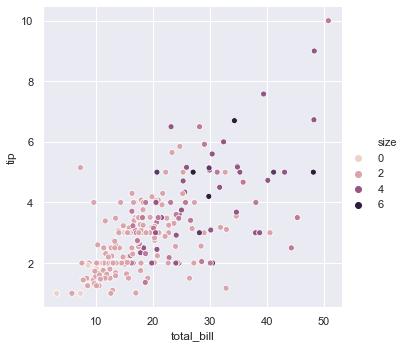

In [8]:
# hue に数値 (float にキャストできるもの) の系列を指定するとグラデーション色調となる
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

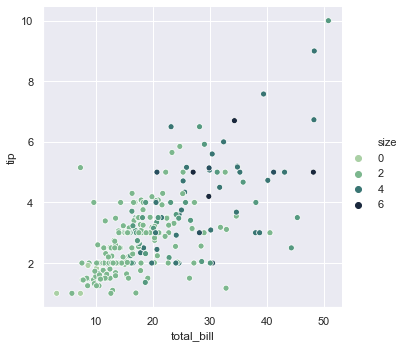

In [9]:
# palette で色調を指定できる
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips);

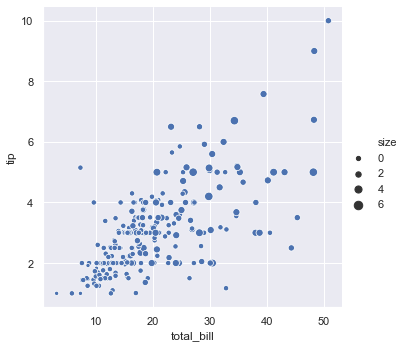

In [10]:
# hue と同様に size に数値の系列を指定すると、マーカーの大小で表現される
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

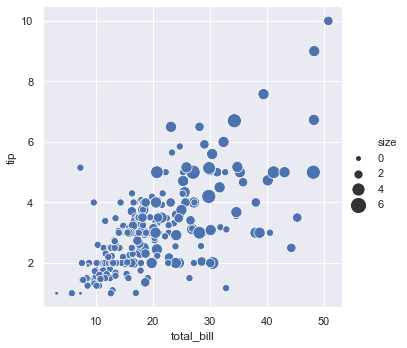

In [11]:
# size で指定した系列が数値であれば、タプルで sizes にマーカーの最小、最大のサイズを与えることができる
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

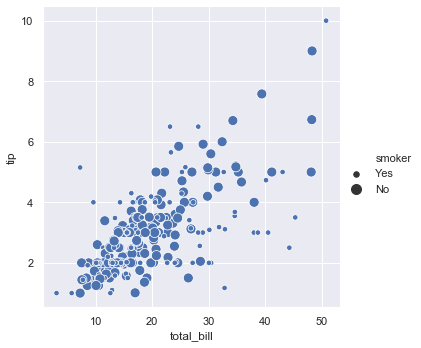

In [12]:
# size で指定した系列がカテゴリカルであれば、辞書で sizes に指定できる
sns.relplot(x="total_bill", y="tip", size="smoker", sizes={"Yes": 30, "No": 100}, data=tips);

## Emphasizing continuity with line plots  

In [13]:
# ランダムウォークデータを作成
df_0 = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
df_0.head()

,time,value
0,0,-0.308713
1,1,-1.691694
2,2,-1.628635
3,3,-0.109849
4,4,-2.860419


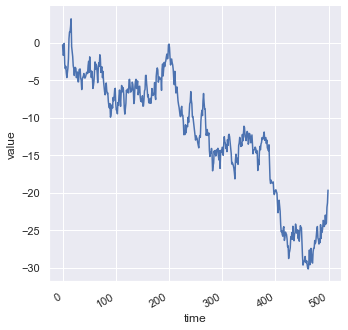

In [14]:
# kind="line" で各データを線で結んだ図となる
# kind="scatter" とするか何も指定しなければ散布図となる
g = sns.relplot(x="time", y="value", kind="line", data=df_0)
g.fig.autofmt_xdate()  # x 軸ラベルをいい感じに回転して、被らないようにしてくれる

In [15]:
# 2 次元座標系でのランダムウォークデータ
df_1 = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
df_1.head()

,x,y
0,-1.370452,1.015601
1,-2.409689,0.636461
2,-1.692235,3.176010
3,-0.601083,3.094035
4,-0.173227,3.867894


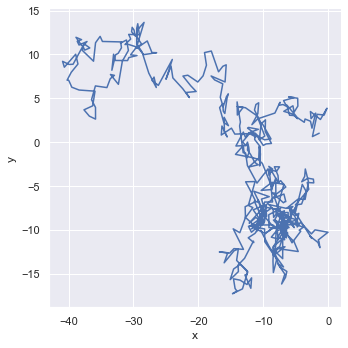

In [16]:
# デフォルトでは、描画前に x 軸の系列をソートしてしまうため、この機能をオフにする
sns.relplot(x="x", y="y", sort=False, kind="line", data=df_1);

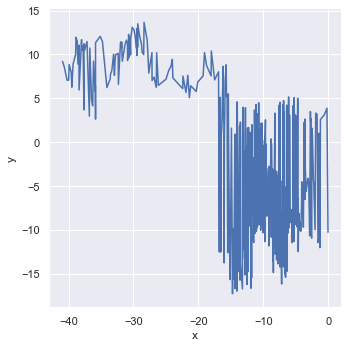

In [17]:
# ソートをオフにしなかった場合はこうなってしまう…
sns.relplot(x="x", y="y", kind="line", data=df_1);

### Aggregation and representing uncertainty  

In [18]:
# 同じ x 値に対して複数の y 値があるデータ
# ここでは timepoint を x、signal を y として描画する
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


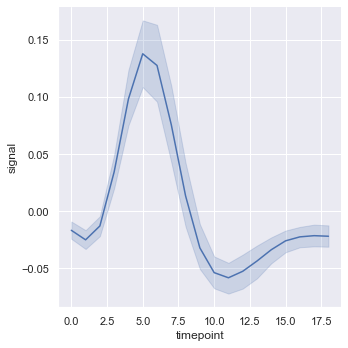

In [19]:
# デフォルトでは 95 % 信頼区間を薄い色の領域で表示する
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

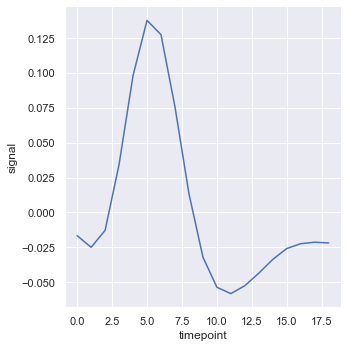

In [20]:
# 信頼区間はブートストラップ法を使って計算されるので、
# 大規模なデータセットでは描画に時間がかかることもある
# ci=None でこの機能をオフにできる (ci → confidence interval)
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

[Ｒとブートストラップ](https://www1.doshisha.ac.jp/~mjin/R/Chap_44/44.html)  

In [ ]:
# ci="sd" で標準偏差の領域を描画する
# 信頼区間描画よりも計算負荷は低い
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

In [ ]:
# estimator=None でこれまでのような集約をオフにできるが、
# 下記のようによくわからない図ができてしまう…
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

### Plotting subsets of data with semantic mappings  

In [ ]:
# 散布図のときのように、hue で指定した系列のカテゴリーごとに
# 線を分けることができる
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

In [ ]:
# style も同様
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

In [ ]:
# 破線で描かずに、マーカーを指定して識別したい場合
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

In [ ]:
# 線の色とスタイルを同時に変えたほうが、白黒印刷時や
# 色覚異常者に対して配慮した図になる
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            kind="line", data=fmri);

In [ ]:
# 今回のように複数回測定されたデータを個別に描画できる 
# (subject 系列は被験者毎のラベルを表している？ → units= で指定)
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"));

In [ ]:
# なお、下記は fmri[fmri["event"]=="stim"] と同じ
fmri.query("event == 'stim'")

In [ ]:
# 新たなデータのロード
dots = sns.load_dataset("dots").query("align == 'dots'")
dots

In [ ]:
# coherence は数値、 choise はカテゴリカルな系列
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

In [ ]:
# pallete で色調を指定
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots);

## Showing multiple relationships with facets  

In [ ]:
# カテゴリカルな系列 "time" を col に渡すと、横並びで系列ごと描画する
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

In [ ]:
# さらに、カテゴリカルな系列を row に渡すと、縦並びに描画する
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

In [ ]:
# fmri データの被験者毎に描画するような場合は、行あたりの列数を指定 (col_wrap)、
# 高さの指定 (height)、縦横比の指定 (aspect)、で下記のように描画する
# linewidth は 線グラフの線の太さになる
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));